In [1]:
# An Imbalanced Dataset is that where the classes are not balanced, for e.g. say Fraud Detection Dataset
# In the dataset there will be very less Fraud transactions than the good transactions, so the Dataset 
# is said to be imbalanced and we have to Balance it out for the ML Model to work properly or not be biased 
# Because even a simple python code will give good accuracy

In [2]:
# 1. Under Sampling the majority class:
# In this we randomly take the same number of samples as in the Minor Dataset and then add it to the 
# minor class samples and then train the ML model.
# But here we will be losing a lot of Data and that is a problem because the training will be useless with a high variance

In [3]:
#2. Over Sampling the Minor Samples:
# Here we will be duplication the Minor Samples to be the same no. as the major set, so we will be basically 
# using the same samples of the minor set, and then along with the major set we train the model.

In [4]:
# 3. Over-sampling the Minor set using Synthetic methods called SMOTE:
# SMOTE refers to the Synthetic Minority Over-Sampling Technique
# So here we will be duplicating the minor samples to match the no. in the major set using KNN methods
# This means we will be having ML model generated values, and with that we will be training our Model 
# along with the major set.
# For using the SMOTE method we can use the python module called imblearn.

In [5]:
#4. Ensemble Method:
# Here we divide the major set into batches and with each batch we train the model with the minor set
# We call this model 1 and we do the same with the rest of the sets and, then we predict the final classification using voting
# similar to Random Forests, hard voting and soft voting.

In [6]:
# For this we will be using the Customer Churn Notebook and do a balancing on that dataset

In [7]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# Customer Churn means if the customer is still with the company or has left that as a client to a new company.
# So Churn = Yes means the Customer has left and Churn = No means he hasn't left.
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.drop('customerID', axis =1, inplace =True)# We are dropping the useless customerID Column since we dont need that in our ANN model

In [10]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
df.TotalCharges.values # Here the values are strings and hence the datatype is object but we need the values to be numeric(float)

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [13]:
df.MonthlyCharges.values # The values here are float64 which we need for our ANN

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [14]:
# Let's Change the TotalCharges Values to numeric and for that we need, pd.to_numeric function
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [ ]:
# this Error is due to the fact that some of the Values have space into it, so we have to trim those values or maybe drop the columns
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()]
# This Returns the full Dataframa for which the values of the the TotalCharges had spaces and hence the returned values are NaN
# or blank values,
# So, we can just drop these values and store it in a new dataframe

In [15]:
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()].shape# we can get the shape and can drop 11 rows out of 7043 rows

(11, 20)

In [16]:
# for dropping since we donot know exactly which values have the spaces so we will execute the following:
df1 = df[df.TotalCharges != ' '] # so this will return a new dataframe where the TotalCharges values donot have a space in it

In [17]:
df1.shape

(7032, 20)

In [18]:
df1.dtypes #Now also the TotalCharges are object type since we did'nt actually change it we just dropped the unwanted rows

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [19]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\ADITYA\AppData\Local\Temp\ipykernel_16404\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [20]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [21]:
df1.TotalCharges.head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

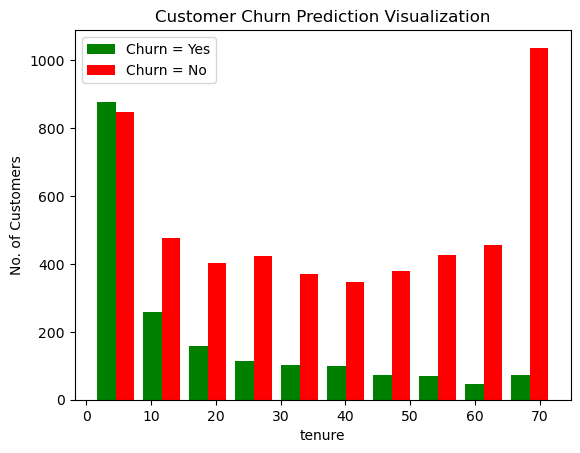

In [22]:
# Now we will be doing some visualization, with tenure vs churn , tenure shows how loyal the customer is, so it'll show you how many loyal
# customer are leaving. We will be using histogram for this.
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure
tenure_churn_no = df1[df1.Churn == 'No'].tenure
plt.xlabel('tenure')
plt.ylabel('No. of Customers')
plt.title('Customer Churn Prediction Visualization')
plt.hist([tenure_churn_yes, tenure_churn_no], color = ['green','red'], label =['Churn = Yes', 'Churn = No'])

plt.legend()

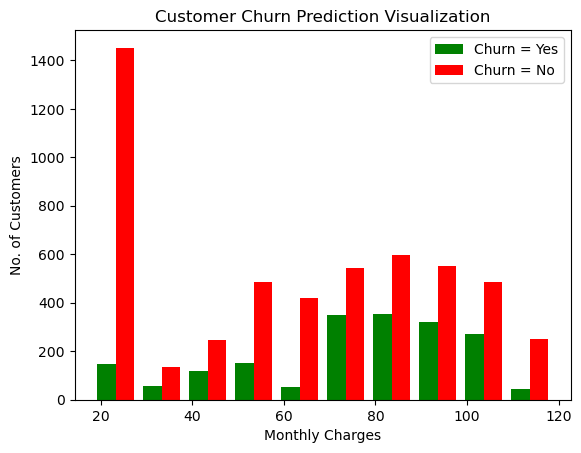

In [23]:
mc_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges
mc_churn_no = df1[df1.Churn == 'No'].MonthlyCharges
plt.xlabel('Monthly Charges')
plt.ylabel('No. of Customers')
plt.title('Customer Churn Prediction Visualization')
plt.hist([mc_churn_yes, mc_churn_no], color = ['green','red'], label =['Churn = Yes', 'Churn = No'])

plt.legend()

In [24]:
# This Dataset has many columns that have the Values Yes and No, so that can be encoded
# So we will check the unique values in all the columns for which the dtype is object
# We will be using a for loop for this and check :
# We will be putting this in a function as well:
def print_unique_col_value(df):
    for column in df1:
         if df[column].dtypes == 'object': # we need to see only those columns for which the dtypes are object
                print(f'{column} : {df[column].unique()}') # this is python f string and it will be returning the
                                                           # column names of the respective columns for better understanding.

In [25]:
print_unique_col_value(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [26]:
# we can see that a lot of values are of the type Yes and No and also we will be replacing the values:
# No Internet Service and types like that with a No with the pandas replace func
df1.replace('No internet service','No',inplace = True)
df1.replace('No phone service','No',inplace = True)

C:\Users\ADITYA\AppData\Local\Temp\ipykernel_16404\514169060.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace = True)
C:\Users\ADITYA\AppData\Local\Temp\ipykernel_16404\514169060.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace = True)


In [27]:
print_unique_col_value(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [28]:
yes_no_columns  = ['Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes' : 1, 'No' : 0},inplace = True)


C:\Users\ADITYA\AppData\Local\Temp\ipykernel_16404\2689980330.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes' : 1, 'No' : 0},inplace = True)


In [29]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,Female,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,Female,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [30]:
for column in df1:
    print(f'{column} : {df1[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 0]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [31]:
df1['gender'].replace({'Female': 1, 'Male': 0},inplace = True)

C:\Users\ADITYA\AppData\Local\Temp\ipykernel_16404\1620502196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female': 1, 'Male': 0},inplace = True)


In [32]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,1,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,1,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,0,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [33]:
# Now our Data Cleaning is almost done and we just have to label the other columns InternetService, Contract and PaymentMethod
# For this we have to one-hot encode these columns since they have more than 2 different types, we will use the get_dummies func of pandas
df2 = pd.get_dummies(data = df1 ,columns = ['InternetService','Contract','PaymentMethod'])

In [34]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,0,1,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,0,0,1,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [35]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [36]:
# So our Dataset is now clean and ready to be fed to the ANN model
# but before than we have to get the data scaled for columnsTotalCharges, MothlyCharges and Tenure which are not in 0 and 1
# rest of the data have values 0 and 1, so we have to scale these columns :
col_to_scale = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[col_to_scale] = scaler.fit_transform(df2[col_to_scale])


In [37]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,1,1,1,0,1,...,0,1,0,0,1,0,0,0,0,1
7039,1,0,1,1,1.000000,1,1,0,1,1,...,0,0,1,0,1,0,0,1,0,0
7040,1,0,1,1,0.140845,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
7041,0,1,1,0,0.042254,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [38]:
df2['MonthlyCharges']

0       0.115423
1       0.385075
2       0.354229
3       0.239303
4       0.521891
          ...   
7038    0.662189
7039    0.845274
7040    0.112935
7041    0.558706
7042    0.869652
Name: MonthlyCharges, Length: 7032, dtype: float64

In [39]:
x = df2.drop('Churn', axis = 'columns')
y = df2['Churn'] # We can alternatively use this : x, y = df2.loc[:,df2.columns != 'Churn'], df1['Churn']

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state =42)

In [41]:
x_train.shape

(5274, 26)

In [42]:
x_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3166,0,0,1,0,0.183099,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
4333,0,0,1,0,0.422535,1,1,1,1,0,...,0,0,1,1,0,0,0,1,0,0
1927,0,0,1,1,0.647887,1,1,0,0,1,...,0,0,1,1,0,0,1,0,0,0
2315,0,0,1,1,0.478873,1,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0
858,1,0,1,0,0.915493,1,1,1,1,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,0,0,0,0,0.028169,1,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
5199,1,0,0,0,0.704225,1,1,0,1,1,...,0,0,1,0,1,0,0,0,1,0
5235,0,0,0,0,0.112676,1,1,1,0,0,...,0,0,1,1,0,0,0,0,1,0
5399,1,0,0,0,0.690141,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0


In [43]:
len(x_train.columns) # So we have 26 Columns which we will be using as the number of inputs in out ANN model

26

In [44]:
model = keras.Sequential([
    keras.layers.Dense(20,input_shape =(26,), activation = 'relu'),
    keras.layers.Dense(15, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)
# Now the model will be trained and so the .fit() is used here.
model.fit(x_train, y_train, epochs = 100)
# I tried with 200 epochs as well but that caused overfitting of the data and the evaluation accuracy was less compared to 100 epochs


Epoch 1/100
165/165 [==============================] - 1s 1ms/step - loss: 0.5421 - accuracy: 0.7089
Epoch 2/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4467 - accuracy: 0.7664
Epoch 3/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4301 - accuracy: 0.7939
Epoch 4/100
165/165 [==============================] - 0s 1ms/step - loss: 0.4233 - accuracy: 0.7983
Epoch 5/100
165/165 [==============================] - 0s 1ms/step - loss: 0.4197 - accuracy: 0.8005
Epoch 6/100
165/165 [==============================] - 0s 1ms/step - loss: 0.4162 - accuracy: 0.8028
Epoch 7/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4139 - accuracy: 0.8041
Epoch 8/100
165/165 [==============================] - 0s 1ms/step - loss: 0.4121 - accuracy: 0.8075
Epoch 9/100
165/165 [==============================] - 0s 982us/step - loss: 0.4105 - accuracy: 0.8072
Epoch 10/100
165/165 [==============================] - 0s 1ms/step - loss: 0.4082 - accu

In [82]:
model.evaluate(x_test,y_test)

55/55 [==============================] - 0s 786us/step - loss: 0.4855 - accuracy: 0.7742


[0.48545077443122864, 0.774175226688385]

In [83]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                540       
                                                                 
 dense_1 (Dense)             (None, 15)                315       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 871
Trainable params: 871
Non-trainable params: 0
_________________________________________________________________


In [84]:
y_predict = model.predict(x_test)
y_predict[:5]

55/55 [==============================] - 0s 861us/step


array([[0.00349645],
       [0.14315353],
       [0.74106646],
       [0.02983246],
       [0.3798571 ]], dtype=float32)

In [85]:
y_test[:5]

2481    0
6784    0
6125    1
3052    0
4099    0
Name: Churn, dtype: int64

In [86]:
y_pred = []
for element in y_predict:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [87]:
y_pred[:5]

[0, 0, 1, 0, 0]

In [88]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1300
           1       0.57      0.54      0.56       458

    accuracy                           0.77      1758
   macro avg       0.71      0.70      0.70      1758
weighted avg       0.77      0.77      0.77      1758



In [89]:
# Check the values of the f1-score, the f1 score for 1 is very low while that of 0 is fine, So this actually
# means that the Dataset is imbalanced and we have to balance it out for better accuracy and better f1 score.

In [90]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1113,  187],
       [ 210,  248]])>

In [91]:
# In the imbalanced dataset tutorial we will be using the same notebook and then balance it out for getting 
# more accurate results.

In [92]:
# Now we have to improve the f1-score of the class 1.

In [93]:
# Class Count:
count_class_0, count_class_1 = df1.Churn.value_counts()
# Divide by class;
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [94]:
count_class_0, count_class_1

(5163, 1869)

In [95]:
df_class_0.shape

(5163, 27)

In [96]:
df_class_1.shape

(1869, 27)

In [97]:
# So you can see that the Dataset is kind of Imbalanced and hence the f1-score of class 1 is pretty low.
df_class_0.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3646,0,0,0,0,0.535211,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
6987,1,1,0,0,0.478873,1,1,1,1,1,...,0,0,1,0,1,0,0,0,1,0
2036,0,1,1,0,0.000000,1,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
584,1,0,0,0,0.028169,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1121,1,0,0,0,0.690141,1,1,1,0,1,...,0,1,0,0,1,0,0,1,0,0


In [98]:
df_class_1.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2124,0,0,1,0,0.056338,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5207,1,1,1,0,0.323944,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
5215,1,0,1,0,0.098592,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
1547,1,0,1,0,0.873239,1,1,0,1,1,...,0,0,1,0,1,0,0,0,1,0
4532,1,0,0,0,0.197183,1,1,0,1,0,...,0,0,1,1,0,0,0,0,1,0


In [99]:
# Here we will are using the first method of Under-Sampling the major set.
df_class_0_under = df_class_0.sample(count_class_1) # So here the new dataset is formed which has the same
# same no. of samples as in the minor set , number represented by count_class_1
df_test_under = pd.concat([df_class_0_under, df_class_1], axis =0 ) # here we are adding the two datasets
# The new dataset we just under sampled and the class 1 set using the .concat function of pandas.
df_test_under.shape

(3738, 27)

In [100]:
# lets check the total samples in each of the dataset, then we will be splitting the train test samples
df_test_under.Churn.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [101]:
# so we will be now be doing the train test split, taking the whole dataset except the Churn column and the y will be the Churn column
x1 = df_test_under.drop('Churn', axis = 'columns')
y1 = df_test_under['Churn'] # We can alternatively use this : x, y = df2.loc[:,df2.columns != 'Churn'], df1['Churn']

from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1 = train_test_split(x1,y1,test_size = 0.2, random_state =15, stratify = y1)


In [102]:
y_train1.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [103]:
model1 = keras.Sequential([
    keras.layers.Dense(20,input_shape =(26,), activation = 'relu'),
    keras.layers.Dense(15, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])
model1.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)
# Now the model will be trained and so the .fit() is used here.
model1.fit(x_train1, y_train1, epochs = 100)
# I tried with 200 epochs as well but that caused overfitting of the data and the evaluation accuracy was less compared to 100 epochs


Epoch 1/100
94/94 [==============================] - 1s 971us/step - loss: 0.6523 - accuracy: 0.6127
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5524 - accuracy: 0.7308
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5239 - accuracy: 0.7371
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5145 - accuracy: 0.7468
Epoch 5/100
94/94 [==============================] - 0s 968us/step - loss: 0.5089 - accuracy: 0.7508
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5061 - accuracy: 0.7485
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5024 - accuracy: 0.7572
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5004 - accuracy: 0.7572
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4973 - accuracy: 0.7559
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4948 - accuracy: 0.7585
Epoch

In [129]:
model.evaluate(x_test1,y_test1)

24/24 [==============================] - 0s 2ms/step - loss: 0.5129 - accuracy: 0.7460


[0.5128514766693115, 0.7459893226623535]

In [105]:
y_predict1 = model.predict(x_test1)
y_predict1[:5]

24/24 [==============================] - 0s 781us/step


array([[0.40462348],
       [0.05528295],
       [0.20948842],
       [0.53754926],
       [0.00074941]], dtype=float32)

In [106]:
y_test1[:5]

5585    1
4247    0
2836    0
1001    1
3375    0
Name: Churn, dtype: int64

In [107]:
y_pred1 = []
for element in y_predict1:
    if element > 0.5:
        y_pred1.append(1)
    else:
        y_pred1.append(0)

In [134]:
y_pred1[:5]

[0, 0, 0, 1, 0]

In [109]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.69      0.89      0.78       374
           1       0.85      0.60      0.70       374

    accuracy                           0.75       748
   macro avg       0.77      0.75      0.74       748
weighted avg       0.77      0.75      0.74       748



In [110]:
# We can now see here that the f1 score for class 1 has increased much more after balancing the dataset

In [111]:
# OVER SAMPLING METHOD:

In [113]:
count_class_0, count_class_1

(5163, 1869)

In [114]:
# Now we will be duplicating the values of the minor(class 1) set to match the number of samples in the major class
df_class_1.sample(count_class_0, replace = True).shape

(5163, 27)

In [116]:
df_class_1_over = df_class_1.sample(count_class_0, replace = True)

In [119]:
df_class_1_over

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5860,1,0,0,0,0.014085,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
666,1,0,0,0,0.014085,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2721,0,1,0,0,0.126761,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2690,0,1,1,1,0.098592,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
5282,1,0,1,0,0.028169,1,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4311,1,0,0,0,0.084507,0,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1478,0,0,0,0,0.563380,1,1,0,1,1,...,0,0,1,1,0,0,0,0,1,0
6141,0,1,1,0,0.718310,1,1,1,0,1,...,0,0,1,1,0,0,0,0,1,0
3766,1,1,0,0,0.000000,1,0,1,0,1,...,0,1,0,1,0,0,0,0,1,0


In [122]:
# now we will be concating this dataframe with the major set and then train test split
df_test_over = pd.concat([df_class_0, df_class_1_over], axis = 0)
df_test_over.shape

(10326, 27)

In [123]:
df_test_over.Churn.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [124]:
x2 = df_test_over.drop('Churn', axis = 1)
y2 = df_test_over['Churn']

from sklearn.model_selection import train_test_split
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,y2,test_size = 0.2, random_state =15, stratify = y2)


In [126]:
y_train2.value_counts(),y_test2.value_counts()

(1    4130
 0    4130
 Name: Churn, dtype: int64,
 1    1033
 0    1033
 Name: Churn, dtype: int64)

In [128]:
model2 = keras.Sequential([
    keras.layers.Dense(20,input_shape =(26,), activation = 'relu'),
    keras.layers.Dense(15, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])
model2.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)
# Now the model will be trained and so the .fit() is used here.
model2.fit(x_train2, y_train2, epochs = 100)
# I tried with 200 epochs as well but that caused overfitting of the data and the evaluation accuracy was less compared to 100 epochs


Epoch 1/100
259/259 [==============================] - 2s 2ms/step - loss: 0.5592 - accuracy: 0.7232
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4943 - accuracy: 0.7588
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4872 - accuracy: 0.7575
Epoch 4/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4819 - accuracy: 0.7599
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4796 - accuracy: 0.7627
Epoch 6/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4773 - accuracy: 0.7663
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4750 - accuracy: 0.7662
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4722 - accuracy: 0.7679
Epoch 9/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4701 - accuracy: 0.7705
Epoch 10/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4686 - accura

In [130]:
model.evaluate(x_test2,y_test2)

65/65 [==============================] - 0s 2ms/step - loss: 0.5251 - accuracy: 0.7493


[0.5250812768936157, 0.749273955821991]

In [131]:
y_predict2 = model.predict(x_test2)
y_predict2[:5]

65/65 [==============================] - 0s 2ms/step


array([[0.75007427],
       [0.02499198],
       [0.41354412],
       [0.86412114],
       [0.01476008]], dtype=float32)

In [132]:
y_test2[:5]

6089    1
4731    0
2471    1
2948    1
5034    0
Name: Churn, dtype: int64

In [133]:
y_pred2 = []
for element in y_predict2:
    if element > 0.5:
        y_pred2.append(1)
    else:
        y_pred2.append(0)

In [135]:
y_pred2[:5]

[1, 0, 0, 1, 0]

In [136]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.70      0.89      0.78      1033
           1       0.84      0.61      0.71      1033

    accuracy                           0.75      2066
   macro avg       0.77      0.75      0.74      2066
weighted avg       0.77      0.75      0.74      2066



In [138]:
# Mehtod 3: SMOTE
x3 = df2.drop('Churn', axis = 'columns')
y3 = df2['Churn']

In [139]:
# Installing the imbalanced-learn module, SMOTE uses KNN algo to replicate the values
!pip install imbalanced-learn

     ------------------------------------ 226.0/226.0 kB 445.8 kB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 1.4 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [143]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy ='minority')# Since we are over-sampling the minority class
x_sm, y_sm = smote.fit_resample(x3,y3)
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [144]:
# So these values are synthetically duplicated by using the KNN algo.
from sklearn.model_selection import train_test_split
x_train3,x_test3,y_train3,y_test3 = train_test_split(x_sm,y_sm,test_size = 0.2, random_state =15, stratify = y_sm)


In [148]:
y_train3.value_counts(),y_test3.value_counts() # So both y test and train has the same no. of samples

(1    4130
 0    4130
 Name: Churn, dtype: int64,
 1    1033
 0    1033
 Name: Churn, dtype: int64)

In [149]:
modelsm = keras.Sequential([
    keras.layers.Dense(20,input_shape =(26,), activation = 'relu'),
    keras.layers.Dense(15, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])
modelsm.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)
# Now the model will be trained and so the .fit() is used here.
modelsm.fit(x_train3, y_train3, epochs = 100)
# I tried with 200 epochs as well but that caused overfitting of the data and the evaluation accuracy was less compared to 100 epochs


Epoch 1/100
259/259 [==============================] - 2s 2ms/step - loss: 0.5493 - accuracy: 0.7266
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4702 - accuracy: 0.7751
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4601 - accuracy: 0.7832
Epoch 4/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4540 - accuracy: 0.7856
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4495 - accuracy: 0.7908
Epoch 6/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4453 - accuracy: 0.7929
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4414 - accuracy: 0.7924
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4379 - accuracy: 0.7965
Epoch 9/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4361 - accuracy: 0.7998
Epoch 10/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4310 - accura

In [150]:
model.evaluate(x_test3,y_test3)

65/65 [==============================] - 0s 2ms/step - loss: 0.4957 - accuracy: 0.7599


[0.4957084059715271, 0.7599225640296936]

In [151]:
y_predict3 = model.predict(x_test3)
y_predict3[:5]

65/65 [==============================] - 0s 2ms/step


array([[0.5918655 ],
       [0.02499198],
       [0.7782673 ],
       [0.7824319 ],
       [0.01476008]], dtype=float32)

In [152]:
y_test3[:5]

3045     1
4723     0
10271    1
9289     1
5026     0
Name: Churn, dtype: int64

In [153]:
y_pred3 = []
for element in y_predict3:
    if element > 0.5:
        y_pred3.append(1)
    else:
        y_pred3.append(0)

In [155]:
y_pred3[:5]

[1, 0, 1, 1, 0]

In [156]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.71      0.89      0.79      1033
           1       0.85      0.63      0.72      1033

    accuracy                           0.76      2066
   macro avg       0.78      0.76      0.76      2066
weighted avg       0.78      0.76      0.76      2066

